## Plotting Simluation Runs
In this notebook, we will plot simluation runs after running either `run-lanefollow-experiments.ipynb` and `run-hijacking-experiments.ipynb`. 

### Step 1: Import Dependencies
`carla.planner.map` will allow us to plot the trajectories of each simulation run on an approximate CARLA map. We will use `pandas` to read csv files generated by the CARLA simulator.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Circle
from carla.planner.map import CarlaMap

### Step 2: Set up Plotting Paremeters
We need to choose the path and town where the results of our simulations are stored. In the case of running `run-lanefollow-experiments.ipynb`, these will be in directory `_benchmarks_results/Town01_nemesisA`.

In [2]:
path       = '_benchmarks_results/'
town       = 'Town01_nemesisA'
experiment = town + '/'

### Step 4: Get all Simulation Runs
Now, let's iterate through this directory and get the csv files which describe each simulation run in a frame-by-frame manner.

In [3]:
folders = os.listdir(path + experiment)

for folder in folders:
    if 'AdversarySuite' not in folder.split('_'):
        folders.remove(folder)
    if 'baseline' in folder.split('_'):
        baseline_path = folder
        folders.remove(folder)

### Step 5: Plot Runs
Finally, let's plot each run on the CARLA map.

Text(0, 0.5, 'Y pos')

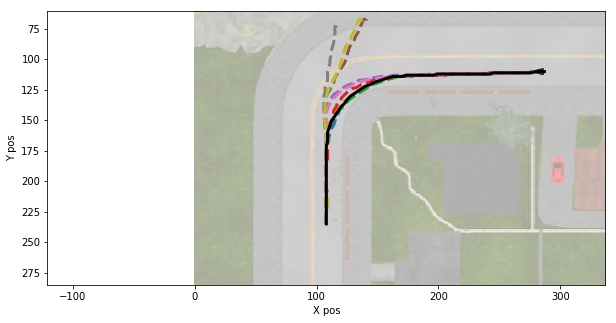

In [4]:
# get the baseline run
df_baseline = pd.read_csv(path + experiment + baseline_path + '/measurements.csv')

# read in the carla map and place in background
carla_map = CarlaMap('Town01_nemesis', 0.1653, 50)
image     = mpimg.imread("carla/planner/Town01_nemesis.png")
fig, ax   = plt.subplots(1)
pad       = 50

# set parameters of the figure
fig.set_size_inches(10, 10) 
plt.rcParams.update({'font.size': 12})
ax.imshow(image, alpha=0.4)

# get x,y position of baseline run
baseX, baseY  = df_baseline['pos_x'], df_baseline['pos_y']
MAX_LEN       = int(len(baseX)*.8)
baseX, baseY  = baseX[:MAX_LEN], baseY[:MAX_LEN] 
    
# iterate through each simulation run
for item in range(len(folders)):
    # get the csv path for current simulation run
    csv_path = path + experiment + 'adversary_{}_AdversarySuite_{}'.format(item, town) + '/measurements.csv'
    try:
        df_adversary = pd.read_csv(csv_path)
    except:
        continue
        
    if df_adversary.shape[0] == 0:
        print("Skipping {}".format(csv_path))
        continue
    
    # get x,y position of vehicle during an attack.
    attackX, attackY = df_adversary['pos_x'][:MAX_LEN], df_adversary['pos_y'][:MAX_LEN]
    
    # plot attackX, attackY, on the CARLA map
    pixelX = []
    pixelY = []
    for i in range(len(attackX)):
        pixel = carla_map.convert_to_pixel([attackX[i], attackY[i], 0])
        pixelX.append(pixel[0])
        pixelY.append(pixel[1]) 
        
    plt.plot(pixelX, pixelY,'--',linewidth=3.0, label='attack ' + str(item))

# 
pixelX = []
pixelY = []
for i in range(len(baseX)):
    pixel = carla_map.convert_to_pixel([baseX[i], baseY[i], 0])
    pixelX.append(pixel[0])
    pixelY.append(pixel[1])
    
plt.plot(pixelX, pixelY, color='k', linewidth=3.0, label='base')
plt.arrow(pixelX[-1], pixelY[-1], -1, 0, length_includes_head=False, head_width=5, head_length=10)
    
plt.axis([min([pixelX[0], pixelX[-1], 2*pixelX[0]-pixelX[-1]]) - pad, max(pixelX[0], pixelX[-1]) + pad, 
          max(pixelY[0], pixelY[-1]) + pad, min(pixelY[0], pixelY[-1]) - pad])
plt.xlabel('X pos')
plt.ylabel('Y pos')